Link Drive : [link text](https://drive.google.com/drive/folders/1LhWRmd0kXXqjTK5lsuN5PjfkN4Hrk5FQ?usp=sharing)

# Integrasi Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
folder_path = "/content/drive/MyDrive/Project Akhir Data Wrangling"
all_files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx") and "Data Ketenagakerjaan" in f and "Integrasi" not in f and "Cleaning" not in f]

dataframes = []
for file in all_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)

    # Extract year from the filename
    year = int(file.split(' ')[2].replace('.xlsx', ''))
    df['Tahun'] = year
    dataframes.append(df)
    print(f"Berhasil membaca: {file}")

df_total = pd.concat(dataframes, axis=0, ignore_index=True)
print(f"Jumlah total baris: {len(df_total)}")
df_total.head()

output_path = "/content/drive/MyDrive/Project Akhir Data Wrangling/Data_Integrasi_Ketenagakerjaan.xlsx"
df_total.to_excel(output_path, index=False)

print(f"✅ File gabungan berhasil disimpan ke: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Berhasil membaca: Data Ketenagakerjaan 2024.xlsx
Berhasil membaca: Data Ketenagakerjaan 2023.xlsx
Berhasil membaca: Data Ketenagakerjaan 2022.xlsx
Jumlah total baris: 122
✅ File gabungan berhasil disimpan ke: /content/drive/MyDrive/Project Akhir Data Wrangling/Data_Integrasi_Ketenagakerjaan.xlsx


# Cleaning Data

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Project Akhir Data Wrangling/Data_Integrasi_Ketenagakerjaan.xlsx")
print("data kotor")
df

data kotor


,Provinsi,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Pencari Kerja Terdaftar - Jumlah,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Jumlah,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Jumlah,Pencari Kerja Terdaftar - Laki-Laki atau Perempuan,Tahun
0,Aceh,4468.0,3696.0,8164.0,227.0,17.0,6885.0,3206.0,2995.0,6201.0,6641.0,2024
1,Sumatera Utara,9471.0,8571.0,18042.0,1144.0,438.0,9312.0,3355.0,2513.0,5868.0,7730.0,2024
2,Sumatera Barat,6200.0,5321.0,11521.0,605.0,781.0,10674.0,2916.0,2264.0,5180.0,9288.0,2024
3,Riau,5113.0,2225.0,7338.0,1408.0,312.0,6241.0,2210.0,698.0,2908.0,4521.0,2024
4,Jambi,3919.0,2292.0,6211.0,423.0,67.0,2960.0,1382.0,992.0,2374.0,2470.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Papua,1294.0,489.0,1783.0,160.0,95.0,255.0,120.0,93.0,213.0,NaN,2022
118,Indonesia,541875.0,395301.0,937176.0,32259.0,27017.0,59276.0,28926.0,25990.0,54916.0,NaN,2022
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
120,Catatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [ ]:
print(f"Shape: {df.shape}")

Shape: (122, 12)


In [ ]:
#Membersihkan nama kolom
df.columns = [str(col).strip().replace("\n", " ").replace(" ", " ") for col in df.columns]

#Menghapus kolom Unnamed
drop_cols = [col for col in df.columns if "Unnamed" in col]
df = df.drop(columns=drop_cols, errors="ignore")

#Menghapus baris yang semua kolom kosong
df = df.dropna(how="all")

#Membersihkan kolom Provinsi
if "Provinsi" in df.columns:
    df["Provinsi"] = df["Provinsi"].astype(str).str.strip()

    #Menghapus baris yang Provinsi-nya 'nan' atau kosong
    df = df[df["Provinsi"] != "nan"]
    df = df[df["Provinsi"] != ""]

    #Menghapus baris yang mengandung metadata/keterangan
    keywords_to_remove = [
        'catatan',
        'data kondisi',
        'last updated',
        'hasil perhitungan',
        'estimation calculation',
        '<ul>',
        '<li>',
        '</ul>',
        '</li>',
        'data provinsi papua barat mencakup',
        'data provinsi papua mencakup',
        'data of papua'
    ]

    #Memfilter baris yang mengandung keyword
    mask = df['Provinsi'].str.lower().str.contains('|'.join(keywords_to_remove), case=False, na=False)
    df = df[~mask]

#mengkonversi kolom Tahun ke numerik
if 'Tahun' in df.columns:
    df['Tahun'] = pd.to_numeric(df['Tahun'], errors='coerce')

    #Menghapus baris dengan Tahun yang tidak valid (NaN)
    df = df[df['Tahun'].notna()]

#Mengkonversi kolom numerik lainnya
num_cols = [col for col in df.columns if col not in ['Provinsi', 'Tahun']]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#Mengecek berapa banyak missing values per baris
missing_per_row = df[num_cols].isnull().sum(axis=1)
print("ANALISIS MISSING VALUES")
print(f"Distribusi jumlah kolom kosong per baris:")
print(missing_per_row.value_counts().sort_index())

#Opsi 1: Hapus baris dengan > 50% kolom kosong
threshold = len(num_cols) * 0.5
df = df[missing_per_row <= threshold]

#Opsi 2: Atau fill dengan 0
df = df.fillna(0)

#Mereset index
df = df.reset_index(drop=True)

#Memvalidasi data provinsi Indonesia
valid_provinces = [
    'Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
    'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kepulauan Bangka Belitung',
    'Kepulauan Riau', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah',
    'DI Yogyakarta', 'Jawa Timur', 'Banten', 'Bali', 'Nusa Tenggara Barat',
    'Nusa Tenggara Timur', 'Kalimantan Barat', 'Kalimantan Tengah',
    'Kalimantan Selatan', 'Kalimantan Timur', 'Kalimantan Utara',
    'Sulawesi Utara', 'Sulawesi Tengah', 'Sulawesi Selatan',
    'Sulawesi Tenggara', 'Gorontalo', 'Sulawesi Barat', 'Maluku',
    'Maluku Utara', 'Papua Barat', 'Papua Barat Daya', 'Papua',
    'Papua Selatan', 'Papua Tengah', 'Papua Pegunungan', 'Indonesia'
]

#Memfilter hanya provinsi valid
df = df[df['Provinsi'].isin(valid_provinces)]

#Menghapus duplikat (jika ada)
df = df.drop_duplicates(subset=['Provinsi', 'Tahun'], keep='first')

print("DATA SETELAH CLEANING")
print(f"Shape: {df.shape}")
print(f"Jumlah provinsi unik: {df['Provinsi'].nunique()}")
print(f"Provinsi yang ada:")
print(sorted(df['Provinsi'].unique()))
print(f"Distribusi data per tahun:")
print(df['Tahun'].value_counts().sort_index())
print("PREVIEW DATA CLEAN")
print(df.head(10))

ANALISIS MISSING VALUES
Distribusi jumlah kolom kosong per baris:
0     39
1     70
10     4
Name: count, dtype: int64
DATA SETELAH CLEANING
Shape: (109, 12)
Jumlah provinsi unik: 39
Provinsi yang ada:
['Aceh', 'Bali', 'Banten', 'Bengkulu', 'DI Yogyakarta', 'DKI Jakarta', 'Gorontalo', 'Indonesia', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Papua Barat Daya', 'Papua Pegunungan', 'Papua Selatan', 'Papua Tengah', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara']
Distribusi data per tahun:
Tahun
2022    35
2023    35
2024    39
Name: count, dtype: int64
PREVIEW DATA CLEAN
                    Provinsi  Pencari Kerja Terd

# Data Storing

In [ ]:
#Menyimpan hasil
output_path = "/content/drive/MyDrive/Project Akhir Data Wrangling/Data_Cleaning_Ketenagakerjaan.xlsx"
df.to_excel(output_path, index=False)
print(f"Data berhasil disimpan ke: {output_path}")

Data berhasil disimpan ke: /content/drive/MyDrive/Project Akhir Data Wrangling/Data_Cleaning_Ketenagakerjaan.xlsx


# Expolaroty Data Algorithm

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Project Akhir Data Wrangling/Data_Cleaning_Ketenagakerjaan.xlsx')
df

,Provinsi,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Pencari Kerja Terdaftar - Jumlah,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Jumlah,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Jumlah,Pencari Kerja Terdaftar - Laki-Laki atau Perempuan,Tahun
0,Aceh,4468,3696,8164,227,17,6885,3206,2995,6201,6641,2024
1,Sumatera Utara,9471,8571,18042,1144,438,9312,3355,2513,5868,7730,2024
2,Sumatera Barat,6200,5321,11521,605,781,10674,2916,2264,5180,9288,2024
3,Riau,5113,2225,7338,1408,312,6241,2210,698,2908,4521,2024
4,Jambi,3919,2292,6211,423,67,2960,1382,992,2374,2470,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
104,Maluku,4401,3092,7493,560,485,1045,554,485,1039,0,2022
105,Maluku Utara,6563,3156,9719,288,200,488,228,190,418,0,2022
106,Papua Barat,1066,1029,2095,262,319,581,258,317,575,0,2022
107,Papua,1294,489,1783,160,95,255,120,93,213,0,2022


In [ ]:
df.shape

(109, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Provinsi                                            109 non-null    object
 1   Pencari Kerja Terdaftar - Laki-Laki                 109 non-null    int64 
 2   Pencari Kerja Terdaftar - Perempuan                 109 non-null    int64 
 3   Pencari Kerja Terdaftar - Jumlah                    109 non-null    int64 
 4   Lowongan Kerja Terdaftar - Laki-Laki                109 non-null    int64 
 5   Lowongan Kerja Terdaftar - Perempuan                109 non-null    int64 
 6   Lowongan Kerja Terdaftar - Jumlah                   109 non-null    int64 
 7   Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki       109 non-null    int64 
 8   Penempatan/Pemenuhan Tenaga Kerja - Perempuan       109 non-null    int64 
 9   Penempatan

In [ ]:
df.describe()

,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Pencari Kerja Terdaftar - Jumlah,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Jumlah,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Jumlah,Pencari Kerja Terdaftar - Laki-Laki atau Perempuan,Tahun
count,1.090000e+02,109.000000,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,3.822086e+04,29057.614679,6.727848e+04,4002.275229,3294.660550,16640.733945,6844.165138,5354.073394,12198.238532,9343.798165,2023.036697
std,1.253017e+05,94700.118064,2.196547e+05,14338.695083,11151.014424,66331.194779,23881.234896,19020.578343,42712.449127,51170.429834,0.826938
min,1.700000e+01,13.000000,3.000000e+01,47.000000,8.000000,168.000000,6.000000,10.000000,17.000000,0.000000,2022.000000
25%,3.263000e+03,2296.000000,5.937000e+03,279.000000,147.000000,694.000000,425.000000,310.000000,864.000000,0.000000,2022.000000
50%,7.470000e+03,4827.000000,1.201500e+04,635.000000,473.000000,1794.000000,1330.000000,719.000000,1927.000000,0.000000,2023.000000
75%,1.620900e+04,10570.000000,2.772200e+04,1602.000000,1268.000000,6885.000000,3355.000000,2264.000000,5534.000000,1371.000000,2024.000000
max,1.061870e+06,757960.000000,1.819830e+06,132469.000000,84503.000000,630672.000000,182967.000000,140848.000000,307926.000000,509237.000000,2024.000000


In [ ]:
df['Provinsi'].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung',
       'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'DKI Jakarta',
       'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur',
       'Banten', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara',
       'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara',
       'Gorontalo', 'Sulawesi Barat', 'Maluku', 'Maluku Utara',
       'Papua Barat', 'Papua Barat Daya', 'Papua', 'Papua Selatan',
       'Papua Tengah', 'Papua Pegunungan', 'Indonesia'], dtype=object)

In [ ]:
duplicates = df.duplicated(subset=['Provinsi', 'Tahun']).sum()
print(f"Jumlah duplikat: {duplicates}")

Jumlah duplikat: 0


In [ ]:
missing = df.isnull().sum()
if missing.sum() > 0:
    print("Missing values:")
    print(missing[missing > 0])
else:
    print("Tidak ada missing values")

Tidak ada missing values


In [ ]:
print("Deteksi Outliers (IQR Method):")
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Tahun')
for col in numeric_cols[:3]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"  {col}: {len(outliers)} outliers")

Deteksi Outliers (IQR Method):
  Pencari Kerja Terdaftar - Laki-Laki: 16 outliers
  Pencari Kerja Terdaftar - Perempuan: 17 outliers
  Pencari Kerja Terdaftar - Jumlah: 15 outliers


# Feature Engineering untuk membuat fitur baru dalam menentukan rasio sebagai tahap eksplorasi data yang lebih akurat

In [ ]:
#Rasio gender untuk pencari kerja
df['Rasio_Gender_Pencari'] = df['Pencari Kerja Terdaftar - Laki-Laki'] / df['Pencari Kerja Terdaftar - Perempuan'].replace(0, 1)
df

,Provinsi,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Pencari Kerja Terdaftar - Jumlah,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Jumlah,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Jumlah,Pencari Kerja Terdaftar - Laki-Laki atau Perempuan,Tahun,Rasio_Gender_Pencari
0,Aceh,4468,3696,8164,227,17,6885,3206,2995,6201,6641,2024,1.208874
1,Sumatera Utara,9471,8571,18042,1144,438,9312,3355,2513,5868,7730,2024,1.105005
2,Sumatera Barat,6200,5321,11521,605,781,10674,2916,2264,5180,9288,2024,1.165195
3,Riau,5113,2225,7338,1408,312,6241,2210,698,2908,4521,2024,2.297978
4,Jambi,3919,2292,6211,423,67,2960,1382,992,2374,2470,2024,1.709860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Maluku,4401,3092,7493,560,485,1045,554,485,1039,0,2022,1.423351
105,Maluku Utara,6563,3156,9719,288,200,488,228,190,418,0,2022,2.079531
106,Papua Barat,1066,1029,2095,262,319,581,258,317,575,0,2022,1.035957
107,Papua,1294,489,1783,160,95,255,120,93,213,0,2022,2.646217


In [ ]:
#Rasio lowongan per pencari kerja
df['Rasio_Lowongan_Pencari'] = df['Lowongan Kerja Terdaftar - Jumlah'] / df['Pencari Kerja Terdaftar - Jumlah'].replace(0, 1)
df

,Provinsi,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Pencari Kerja Terdaftar - Jumlah,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Jumlah,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Jumlah,Pencari Kerja Terdaftar - Laki-Laki atau Perempuan,Tahun,Rasio_Gender_Pencari,Rasio_Lowongan_Pencari
0,Aceh,4468,3696,8164,227,17,6885,3206,2995,6201,6641,2024,1.208874,0.843337
1,Sumatera Utara,9471,8571,18042,1144,438,9312,3355,2513,5868,7730,2024,1.105005,0.516129
2,Sumatera Barat,6200,5321,11521,605,781,10674,2916,2264,5180,9288,2024,1.165195,0.926482
3,Riau,5113,2225,7338,1408,312,6241,2210,698,2908,4521,2024,2.297978,0.850504
4,Jambi,3919,2292,6211,423,67,2960,1382,992,2374,2470,2024,1.709860,0.476574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Maluku,4401,3092,7493,560,485,1045,554,485,1039,0,2022,1.423351,0.139463
105,Maluku Utara,6563,3156,9719,288,200,488,228,190,418,0,2022,2.079531,0.050211
106,Papua Barat,1066,1029,2095,262,319,581,258,317,575,0,2022,1.035957,0.277327
107,Papua,1294,489,1783,160,95,255,120,93,213,0,2022,2.646217,0.143017


In [ ]:
#Tingkat penempatan laki-laki (%)
df['Tingkat_Penempatan_Laki'] = (
    df['Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki'] / df['Pencari Kerja Terdaftar - Laki-Laki'].replace(0, 1)
) * 100
df

,Provinsi,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Pencari Kerja Terdaftar - Jumlah,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Jumlah,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Jumlah,Pencari Kerja Terdaftar - Laki-Laki atau Perempuan,Tahun,Rasio_Gender_Pencari,Rasio_Lowongan_Pencari,Tingkat_Penempatan_Laki
0,Aceh,4468,3696,8164,227,17,6885,3206,2995,6201,6641,2024,1.208874,0.843337,71.754700
1,Sumatera Utara,9471,8571,18042,1144,438,9312,3355,2513,5868,7730,2024,1.105005,0.516129,35.423926
2,Sumatera Barat,6200,5321,11521,605,781,10674,2916,2264,5180,9288,2024,1.165195,0.926482,47.032258
3,Riau,5113,2225,7338,1408,312,6241,2210,698,2908,4521,2024,2.297978,0.850504,43.223157
4,Jambi,3919,2292,6211,423,67,2960,1382,992,2374,2470,2024,1.709860,0.476574,35.264098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Maluku,4401,3092,7493,560,485,1045,554,485,1039,0,2022,1.423351,0.139463,12.588048
105,Maluku Utara,6563,3156,9719,288,200,488,228,190,418,0,2022,2.079531,0.050211,3.474021
106,Papua Barat,1066,1029,2095,262,319,581,258,317,575,0,2022,1.035957,0.277327,24.202627
107,Papua,1294,489,1783,160,95,255,120,93,213,0,2022,2.646217,0.143017,9.273570


In [ ]:
#Tingkat penempatan perempuan (%)
df['Tingkat_Penempatan_Perempuan'] = (
    df['Penempatan/Pemenuhan Tenaga Kerja - Perempuan'] / df['Pencari Kerja Terdaftar - Perempuan'].replace(0, 1)
) * 100
df

,Provinsi,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Pencari Kerja Terdaftar - Jumlah,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Jumlah,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Jumlah,Pencari Kerja Terdaftar - Laki-Laki atau Perempuan,Tahun,Rasio_Gender_Pencari,Rasio_Lowongan_Pencari,Tingkat_Penempatan_Laki,Tingkat_Penempatan_Perempuan
0,Aceh,4468,3696,8164,227,17,6885,3206,2995,6201,6641,2024,1.208874,0.843337,71.754700,81.033550
1,Sumatera Utara,9471,8571,18042,1144,438,9312,3355,2513,5868,7730,2024,1.105005,0.516129,35.423926,29.319799
2,Sumatera Barat,6200,5321,11521,605,781,10674,2916,2264,5180,9288,2024,1.165195,0.926482,47.032258,42.548393
3,Riau,5113,2225,7338,1408,312,6241,2210,698,2908,4521,2024,2.297978,0.850504,43.223157,31.370787
4,Jambi,3919,2292,6211,423,67,2960,1382,992,2374,2470,2024,1.709860,0.476574,35.264098,43.280977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Maluku,4401,3092,7493,560,485,1045,554,485,1039,0,2022,1.423351,0.139463,12.588048,15.685640
105,Maluku Utara,6563,3156,9719,288,200,488,228,190,418,0,2022,2.079531,0.050211,3.474021,6.020279
106,Papua Barat,1066,1029,2095,262,319,581,258,317,575,0,2022,1.035957,0.277327,24.202627,30.806608
107,Papua,1294,489,1783,160,95,255,120,93,213,0,2022,2.646217,0.143017,9.273570,19.018405


In [ ]:
#Rasio penempatan per provinsi (kontribusi provinsi terhadap total nasional)
total_penempatan = df['Penempatan/Pemenuhan Tenaga Kerja - Jumlah'].sum()

# Cegah pembagian nol
if total_penempatan == 0:
    total_penempatan = 1

df['Rasio_Penempatan_Provinsi'] = (
    df['Penempatan/Pemenuhan Tenaga Kerja - Jumlah'] / total_penempatan
) * 100

df

,Provinsi,Pencari Kerja Terdaftar - Laki-Laki,Pencari Kerja Terdaftar - Perempuan,Pencari Kerja Terdaftar - Jumlah,Lowongan Kerja Terdaftar - Laki-Laki,Lowongan Kerja Terdaftar - Perempuan,Lowongan Kerja Terdaftar - Jumlah,Penempatan/Pemenuhan Tenaga Kerja - Laki-Laki,Penempatan/Pemenuhan Tenaga Kerja - Perempuan,Penempatan/Pemenuhan Tenaga Kerja - Jumlah,Pencari Kerja Terdaftar - Laki-Laki atau Perempuan,Tahun,Rasio_Gender_Pencari,Rasio_Lowongan_Pencari,Tingkat_Penempatan_Laki,Tingkat_Penempatan_Perempuan,Rasio_Penempatan_Provinsi
0,Aceh,4468,3696,8164,227,17,6885,3206,2995,6201,6641,2024,1.208874,0.843337,71.754700,81.033550,0.466378
1,Sumatera Utara,9471,8571,18042,1144,438,9312,3355,2513,5868,7730,2024,1.105005,0.516129,35.423926,29.319799,0.441333
2,Sumatera Barat,6200,5321,11521,605,781,10674,2916,2264,5180,9288,2024,1.165195,0.926482,47.032258,42.548393,0.389589
3,Riau,5113,2225,7338,1408,312,6241,2210,698,2908,4521,2024,2.297978,0.850504,43.223157,31.370787,0.218711
4,Jambi,3919,2292,6211,423,67,2960,1382,992,2374,2470,2024,1.709860,0.476574,35.264098,43.280977,0.178549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Maluku,4401,3092,7493,560,485,1045,554,485,1039,0,2022,1.423351,0.139463,12.588048,15.685640,0.078143
105,Maluku Utara,6563,3156,9719,288,200,488,228,190,418,0,2022,2.079531,0.050211,3.474021,6.020279,0.031438
106,Papua Barat,1066,1029,2095,262,319,581,258,317,575,0,2022,1.035957,0.277327,24.202627,30.806608,0.043246
107,Papua,1294,489,1783,160,95,255,120,93,213,0,2022,2.646217,0.143017,9.273570,19.018405,0.016020


In [ ]:
#Tren per Tahun
print("Tren Nasional per Tahun:")
tren_nasional = df[df['Provinsi'] == 'Indonesia'].sort_values('Tahun')
if len(tren_nasional) > 0:
    print(tren_nasional[['Tahun', 'Pencari Kerja Terdaftar - Jumlah',
                         'Lowongan Kerja Terdaftar - Jumlah',
                         'Penempatan/Pemenuhan Tenaga Kerja - Jumlah']])

Tren Nasional per Tahun:
     Tahun  Pencari Kerja Terdaftar - Jumlah  \
108   2022                            937176   
73    2023                           1819830   
38    2024                            909671   

     Lowongan Kerja Terdaftar - Jumlah  \
108                              59276   
73                              216972   
38                              630672   

     Penempatan/Pemenuhan Tenaga Kerja - Jumlah  
108                                       54916  
73                                       307926  
38                                       301962  


In [ ]:
df_2024 = df[df['Tahun'] == 2024]
print("Top 10 Provinsi dengan Rasio Penempatan Tertinggi (2024):")
if len(df_2024) > 0:
    top_rasio_2024 = df_2024[df_2024['Provinsi'] != 'Indonesia'].nlargest(10, 'Rasio_Penempatan_Provinsi')[
        ['Provinsi', 'Rasio_Penempatan_Provinsi', 'Pencari Kerja Terdaftar - Jumlah']]
    print(top_rasio_2024)

Top 10 Provinsi dengan Rasio Penempatan Tertinggi (2024):
            Provinsi  Rasio_Penempatan_Provinsi  \
11        Jawa Barat                   5.637150   
12       Jawa Tengah                   4.913102   
14        Jawa Timur                   2.105959   
10       DKI Jakarta                   1.954260   
15            Banten                   0.859050   
13     DI Yogyakarta                   0.687496   
31      Maluku Utara                   0.584157   
7            Lampung                   0.580321   
5   Sumatera Selatan                   0.547680   
25   Sulawesi Tengah                   0.485406   

    Pencari Kerja Terdaftar - Jumlah  
11                            296636  
12                            179414  
14                             76620  
10                             35030  
15                             40044  
13                             11376  
31                             13519  
7                              31259  
5                            

In [ ]:
df_2023 = df[df['Tahun'] == 2023]
print("Top 10 Provinsi dengan Rasio Penempatan Tertinggi (2023):")
if len(df_2023) > 0:
    top_rasio_2023 = df_2023[df_2023['Provinsi'] != 'Indonesia'].nlargest(10, 'Rasio_Penempatan_Provinsi')[
        ['Provinsi', 'Rasio_Penempatan_Provinsi', 'Pencari Kerja Terdaftar - Jumlah']]
    print(top_rasio_2023)

Top 10 Provinsi dengan Rasio Penempatan Tertinggi (2023):
            Provinsi  Rasio_Penempatan_Provinsi  \
50        Jawa Barat                   5.559909   
53        Jawa Timur                   4.224629   
51       Jawa Tengah                   3.628889   
49       DKI Jakarta                   1.189524   
54            Banten                   1.107770   
65  Sulawesi Selatan                   0.975400   
44  Sumatera Selatan                   0.614617   
40    Sumatera Utara                   0.562045   
64   Sulawesi Tengah                   0.438851   
41    Sumatera Barat                   0.416213   

    Pencari Kerja Terdaftar - Jumlah  
50                            542150  
53                            220388  
51                            218013  
49                             85385  
54                            125510  
65                             66960  
44                             48174  
40                             52542  
64                           

In [ ]:
df_2022 = df[df['Tahun'] == 2022]
print("Top 10 Provinsi dengan Rasio Penempatan Tertinggi (2023):")
if len(df_2022) > 0:
    top_rasio_2022 = df_2022[df_2022['Provinsi'] != 'Indonesia'].nlargest(10, 'Rasio_Penempatan_Provinsi')[
        ['Provinsi', 'Rasio_Penempatan_Provinsi', 'Pencari Kerja Terdaftar - Jumlah']]
    print(top_rasio_2022)

Top 10 Provinsi dengan Rasio Penempatan Tertinggi (2023):
                Provinsi  Rasio_Penempatan_Provinsi  \
86           Jawa Tengah                   0.875371   
88            Jawa Timur                   0.607171   
85            Jawa Barat                   0.524892   
100     Sulawesi Selatan                   0.199232   
91   Nusa Tenggara Barat                   0.132144   
76        Sumatera Barat                   0.129737   
87         DI Yogyakarta                   0.128158   
96      Kalimantan Timur                   0.124924   
101    Sulawesi Tenggara                   0.116576   
74                  Aceh                   0.116501   

     Pencari Kerja Terdaftar - Jumlah  
86                             111970  
88                              95978  
85                             292753  
100                             44397  
91                              14393  
76                              20304  
87                              13310  
96              

# Visualisasi Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier pada Pencari Kerja Terdaftar Laki-laki, Perempuan dan Jumlah

In [ ]:
df['Pencari Kerja Terdaftar - Laki-Laki'].describe()

,Pencari Kerja Terdaftar - Laki-Laki
count,1.090000e+02
mean,3.822086e+04
std,1.253017e+05
min,1.700000e+01
25%,3.263000e+03
50%,7.470000e+03
75%,1.620900e+04
max,1.061870e+06


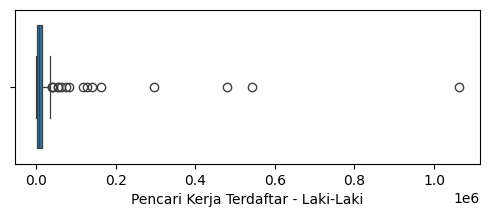

In [ ]:
#membuat boxplot untuk kolom 'Pencari Kerja Terdaftar - Laki-Laki'
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Pencari Kerja Terdaftar - Laki-Laki'],linewidth=0.9);

In [ ]:
df['Pencari Kerja Terdaftar - Perempuan'].describe()

,Pencari Kerja Terdaftar - Perempuan
count,109.000000
mean,29057.614679
std,94700.118064
min,13.000000
25%,2296.000000
50%,4827.000000
75%,10570.000000
max,757960.000000


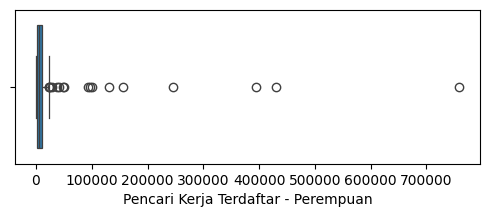

In [ ]:
#membuat boxplot untuk kolom 'Pencari Kerja Terdaftar - Perempuan'
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Pencari Kerja Terdaftar - Perempuan'],linewidth=0.9);

In [ ]:
df['Pencari Kerja Terdaftar - Jumlah'].describe()

,Pencari Kerja Terdaftar - Jumlah
count,1.090000e+02
mean,6.727848e+04
std,2.196547e+05
min,3.000000e+01
25%,5.937000e+03
50%,1.201500e+04
75%,2.772200e+04
max,1.819830e+06


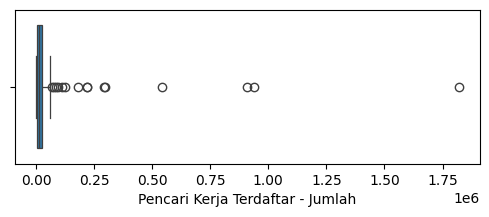

In [ ]:
#membuat boxplot untuk kolom 'Pencari Kerja Terdaftar - Jumlah'
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Pencari Kerja Terdaftar - Jumlah'],linewidth=0.9);

# Top 10 Rasio Penempatan Tertinggi Setiap Tahun

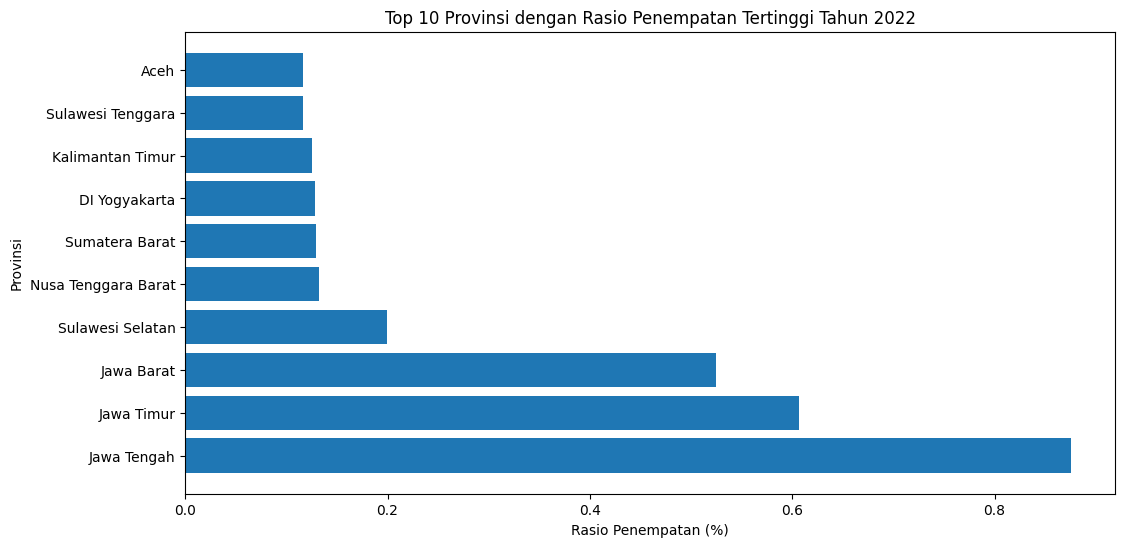

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(top_rasio_2022['Provinsi'], top_rasio_2022['Rasio_Penempatan_Provinsi'])
plt.xlabel("Rasio Penempatan (%)")
plt.ylabel("Provinsi")
plt.title("Top 10 Provinsi dengan Rasio Penempatan Tertinggi Tahun 2022")
plt.show()

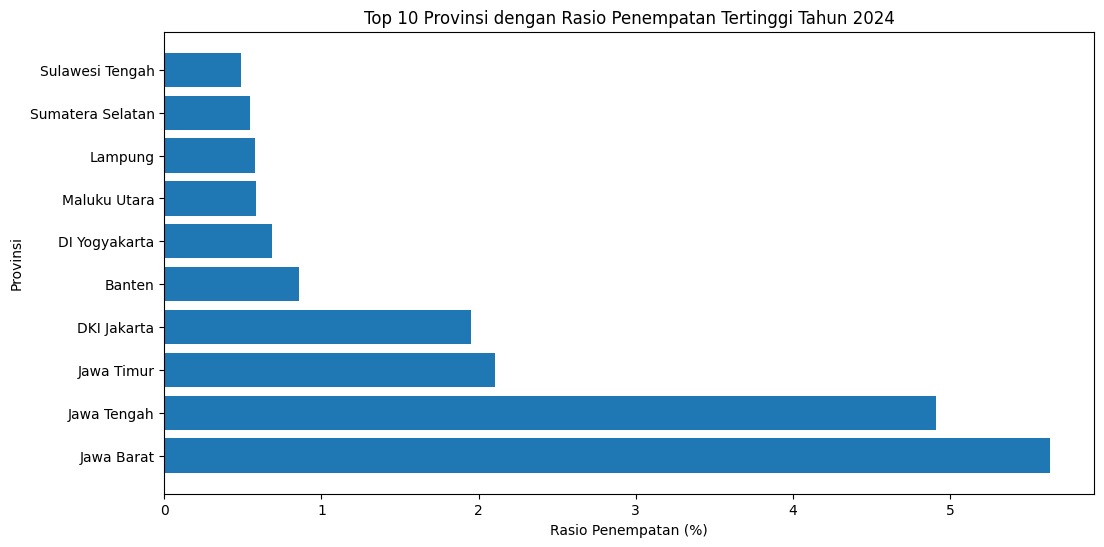

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(top_rasio_2024['Provinsi'], top_rasio_2024['Rasio_Penempatan_Provinsi'])
plt.xlabel("Rasio Penempatan (%)")
plt.ylabel("Provinsi")
plt.title("Top 10 Provinsi dengan Rasio Penempatan Tertinggi Tahun 2024")
plt.show()

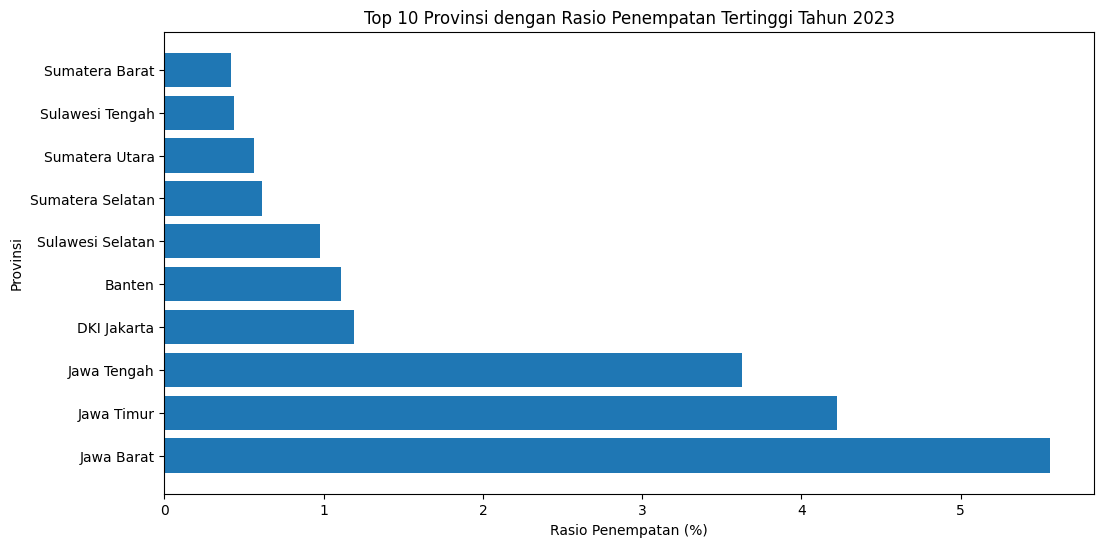

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(top_rasio_2023['Provinsi'], top_rasio_2023['Rasio_Penempatan_Provinsi'])
plt.xlabel("Rasio Penempatan (%)")
plt.ylabel("Provinsi")
plt.title("Top 10 Provinsi dengan Rasio Penempatan Tertinggi Tahun 2023")
plt.show()

# Tren Per Tahun

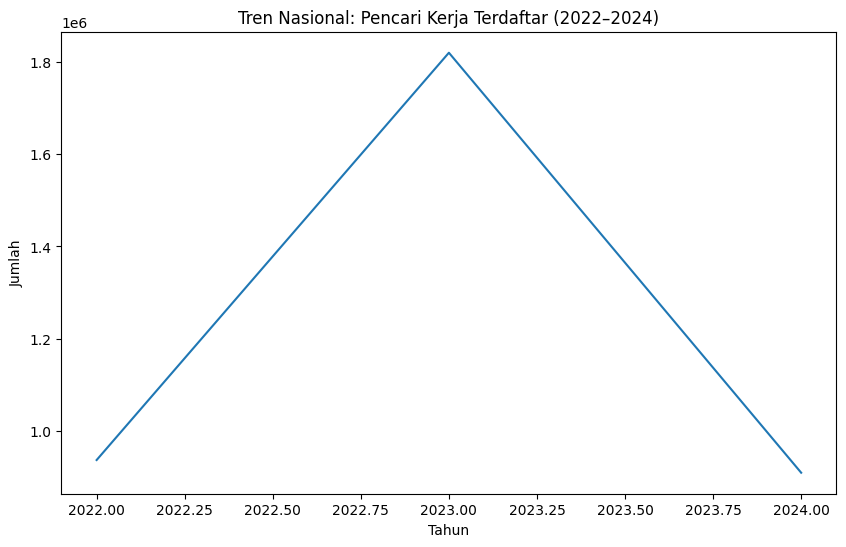

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(tren_nasional["Tahun"], tren_nasional["Pencari Kerja Terdaftar - Jumlah"])
plt.title("Tren Nasional: Pencari Kerja Terdaftar (2022–2024)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

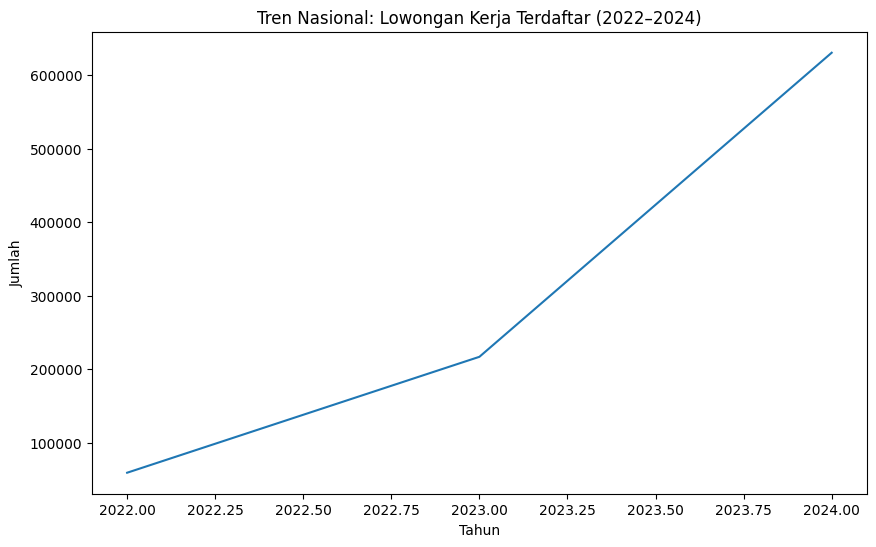

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(tren_nasional["Tahun"], tren_nasional["Lowongan Kerja Terdaftar - Jumlah"])
plt.title("Tren Nasional: Lowongan Kerja Terdaftar (2022–2024)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

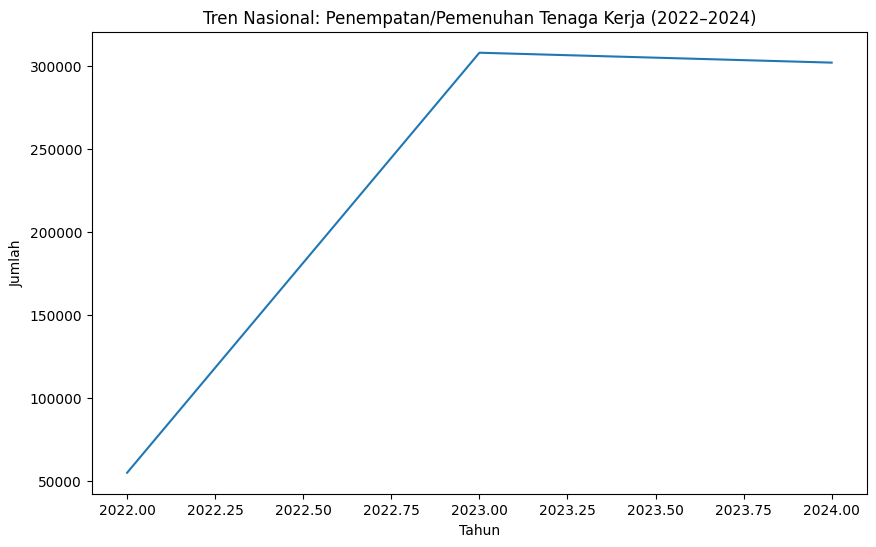

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(tren_nasional["Tahun"], tren_nasional["Penempatan/Pemenuhan Tenaga Kerja - Jumlah"])
plt.title("Tren Nasional: Penempatan/Pemenuhan Tenaga Kerja (2022–2024)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

# Rasio penempatan per provinsi (kontribusi provinsi terhadap total nasional)

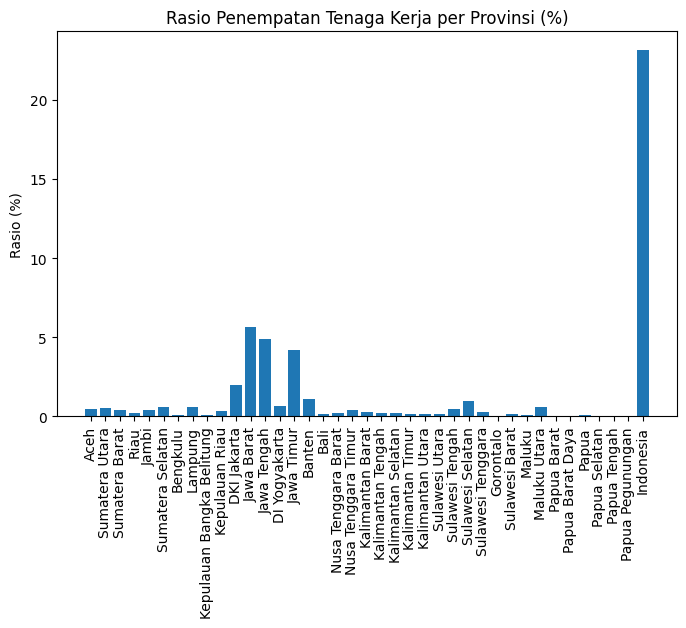

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(df['Provinsi'], df['Rasio_Penempatan_Provinsi'])
plt.xticks(rotation=90)
plt.title("Rasio Penempatan Tenaga Kerja per Provinsi (%)")
plt.ylabel("Rasio (%)")
plt.show()

# Tingkat penempatan perempuan (%)

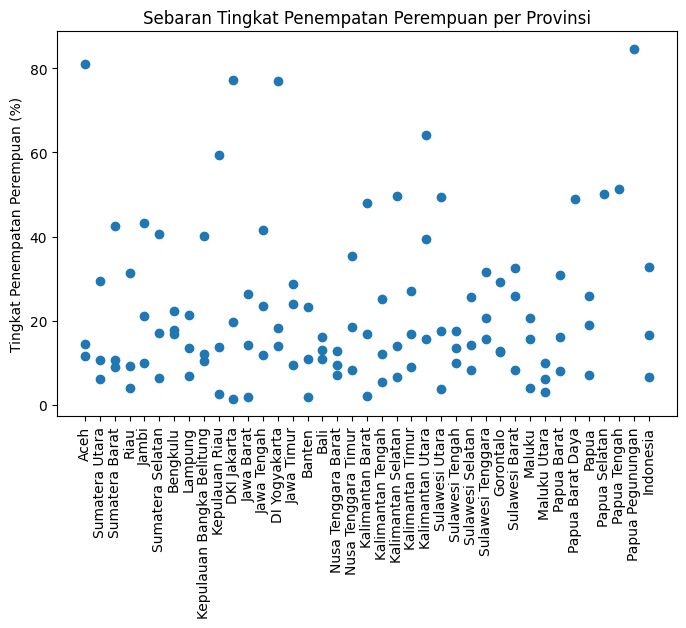

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Provinsi'], df['Tingkat_Penempatan_Perempuan'])
plt.xticks(rotation=90)
plt.ylabel("Tingkat Penempatan Perempuan (%)")
plt.title("Sebaran Tingkat Penempatan Perempuan per Provinsi")
plt.show()

# Tingkat penempatan laki-laki (%)

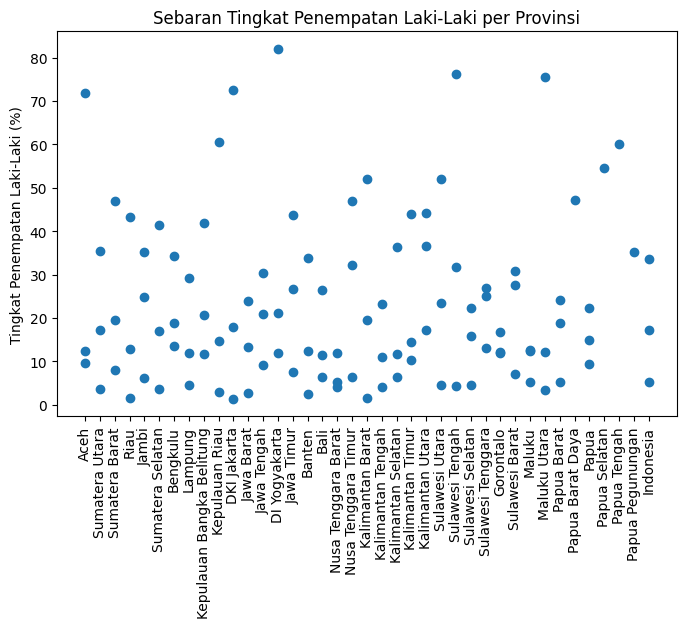

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Provinsi'], df['Tingkat_Penempatan_Laki'])
plt.xticks(rotation=90)
plt.ylabel("Tingkat Penempatan Laki-Laki (%)")
plt.title("Sebaran Tingkat Penempatan Laki-Laki per Provinsi")
plt.show()

# Rasio gender untuk pencari kerja


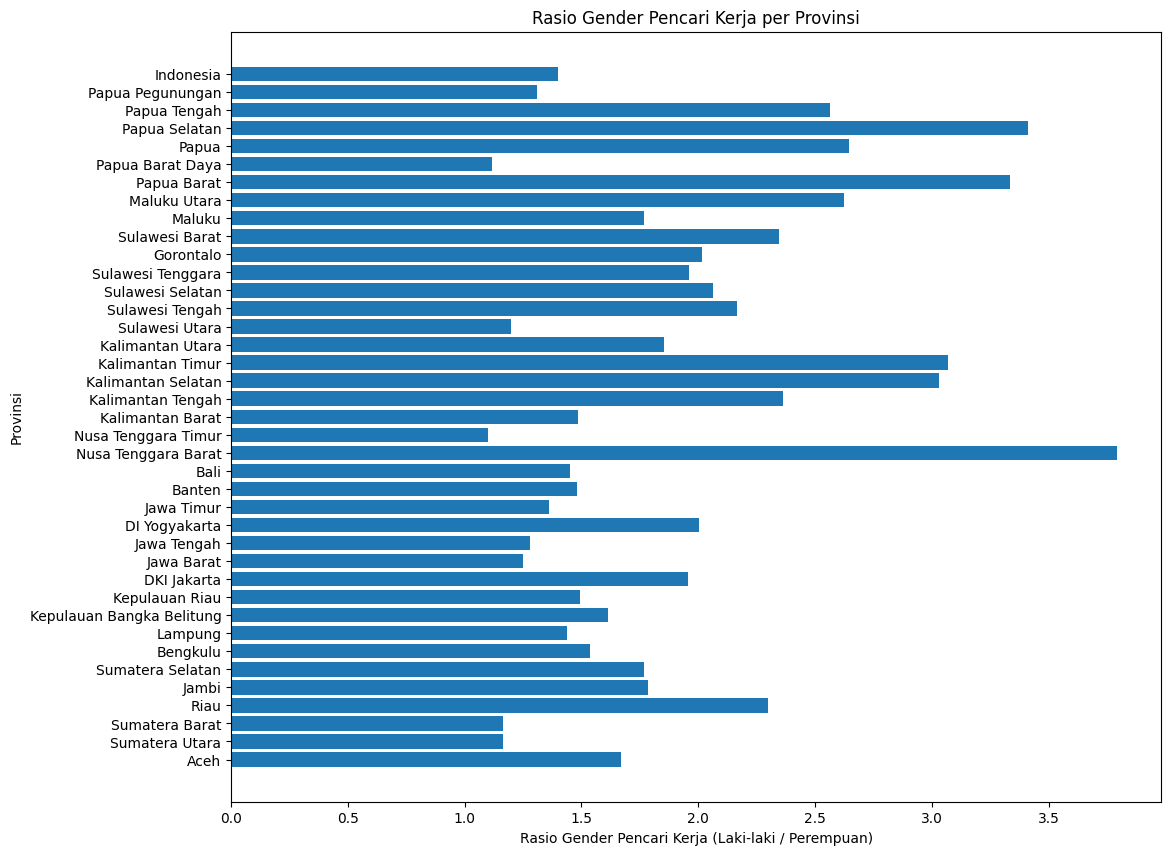

In [ ]:
plt.figure(figsize=(12, 10))
plt.barh(df['Provinsi'], df['Rasio_Gender_Pencari'])
plt.xlabel("Rasio Gender Pencari Kerja (Laki-laki / Perempuan)")
plt.ylabel("Provinsi")
plt.title("Rasio Gender Pencari Kerja per Provinsi")
plt.show()

# Rasio lowongan per pencari kerja

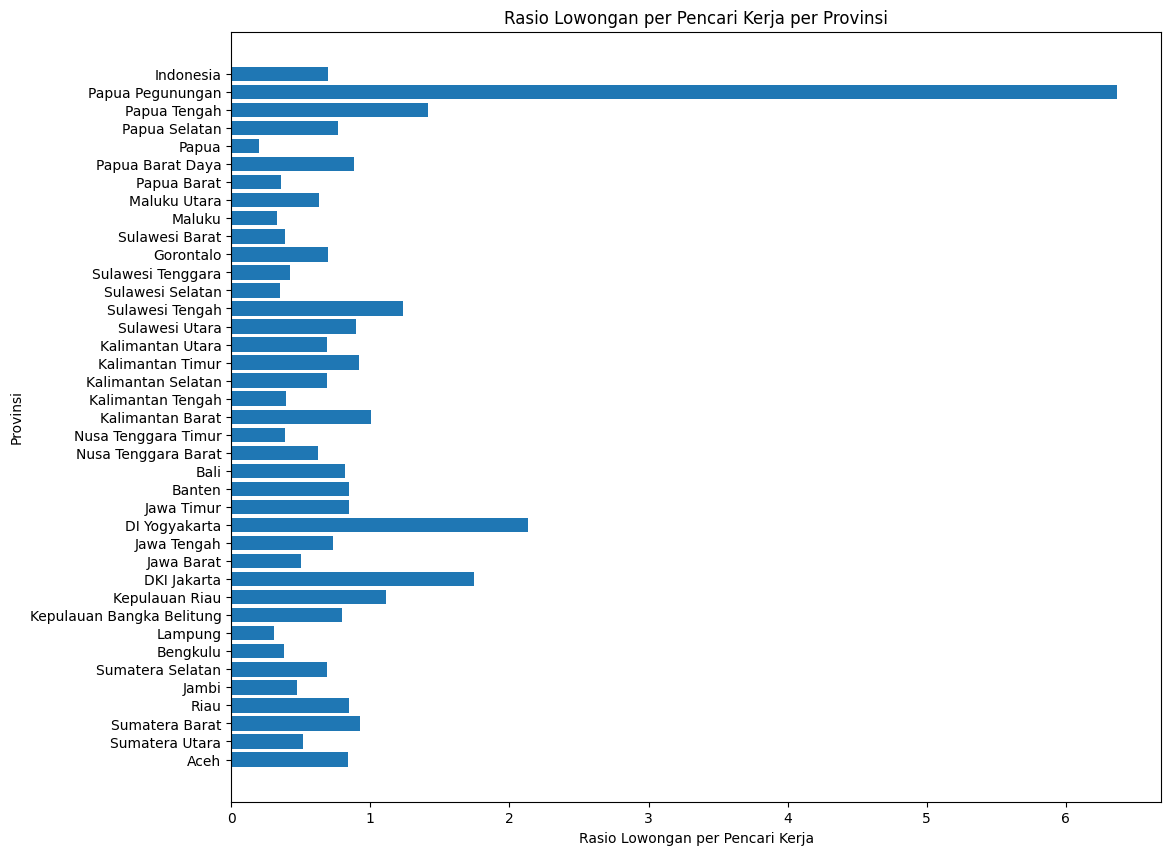

In [ ]:
plt.figure(figsize=(12, 10))
plt.barh(df['Provinsi'], df['Rasio_Lowongan_Pencari'])
plt.xlabel("Rasio Lowongan per Pencari Kerja")
plt.ylabel("Provinsi")
plt.title("Rasio Lowongan per Pencari Kerja per Provinsi")
plt.show()